In [1]:
def load_namespace():
    import sys
    sys.path.insert(1,f'/wsu/home/gy/gy40/gy4065/hm_jetscapeml_source')#WSU Grid
    sys.path.insert(1,'/content/drive/My Drive/Projects/110_JetscapeMl/hm_jetscapeml_source')#Colab GDrive v1
    sys.path.insert(1,'/content/drive/MyDrive/Projects/110_JetscapeMl/hm_jetscapeml_source')#Colab GDrive v2
    sys.path.insert(1,f'/mnt/g/My Drive/Projects/110_JetscapeMl/hm_jetscapeml_source')#wsl gdrive
    sys.path.insert(1,'G:\\My Drive\\Projects\\110_JetscapeMl\\hm_jetscapeml_source') #Windows GDrive
    sys.path.insert(1,'/home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/') #office tower
    
load_namespace()

In [10]:
# Loading/Preparing Environment for simulation
from jet_ml.config import Config
folds=5
epochs=1000
dataset_size=100000 #10800000 #1000000
model_name="res_net"
server_name="wsu_grid_v100_cpu_24_mem_256gb"
simulation_name=f"alpha_s_{model_name}_{folds}_fold_{epochs}_epoch_{int(dataset_size/1000)}k_dataset_size_{server_name}"

config=Config(simulation_name=simulation_name)
config.__str__()

'Project Root: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source\nData Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/data\nModels Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models\nReports Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports\nFigures Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports/figures\nSimulation Models Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_res_net_2_fold_3_epoch_1k_dataset_size_a100\nSimulation Reports Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports/alpha_s_res_net_2_fold_3_epoch_1k_dataset_size_a100\nSimulation Figures Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports/figures/alpha_s_res_net_2_fold_3_epoch_1k_dataset_size_a100\nEnvironment Details:\n  TensorFlow Version: 2.17.0\n  Keras Version: 3.5.0\n  Python Version: 3.12.5 | packaged by conda-

In [3]:
from IPython.display import display
# with tf.device("CPU"):
import jet_ml.classifiers.alpha_s.preprocess_dataset as pred
(x,y_raw,y_df)=pred.preprocess_dataset_for_alpha_s(dataset_size)
y_classes=y_df.columns
y=y_df.values
display("y_classes: ",y_classes)
display("y: ",y[:5])
display("y_raw: ",y_raw[:5])

Dataset Preprocessor
Loading the whole dataset
Extract the working column#1 for classification
dataset.x: <class 'numpy.ndarray'> 1024000 (1000, 32, 32)
dataset.y: <class 'numpy.ndarray'> 1000 (1000,)


'y_classes: '

Index(['0.2', '0.3', '0.4'], dtype='object')

'y: '

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

'y_raw: '

array(['0.2', '0.2', '0.2', '0.2', '0.2'], dtype='<U32')

In [4]:
from jet_ml.classifiers.alpha_s.preprocess_dataset import preprocess_dataset_for_resnet

WIDTH = 256
HEIGHT = 256
import tensorflow as tf
with tf.device("/CPU:0"):
    x_resized,y_resized= preprocess_dataset_for_resnet(x,y,WIDTH,HEIGHT)

'x.shape (1000, 32, 32, 1)'

'y.shape (1000, 3)'

'Data is normalized: True'

'x_rgb.shape (1000, 32, 32, 3)'

'x_resized.shape (1000, 256, 256, 3)'

'y_resized.shape (1000, 3, 1)'

In [ ]:
if folds==1:
    Display("Folds: ",folds)
    TRAIN_PCT = 0.9
    TRAIN_CUT = int(len(x) * TRAIN_PCT)

    x_df_train_cut = x_resized[0:TRAIN_CUT]
    x_df_validate_cut = x_resized[TRAIN_CUT:]

    y_df_train_cut = y_resized[0:TRAIN_CUT]
    y_df_validate_cut = y_resized[TRAIN_CUT:]


    print(f"Training size: {len(x_df_train_cut)}")
    print(f"Validate size: {len(x_df_validate_cut)}")
    from jet_ml.dataset import create_train_data_generator, create_validation_data_generator
    # Usage
    train_generator = create_train_data_generator(x_df_train_cut, y_df_train_cut)
    val_generator = create_validation_data_generator(x_df_validate_cut, y_df_validate_cut)
    display("train_generator_x: ",train_generator.__next__()[0].shape)
    display("train_generator_y: ",train_generator.__next__()[1].shape)
    display("val_generator_x: ",val_generator.__next__()[0].shape)
    display("val_generator_y: ",val_generator.__next__()[1].shape)
    from jet_ml.models.resnet import build_model

    with tf.device('/GPU:0'):#/GPU:0
        import tensorflow as tf
        # Enable logging of device placement
        tf.debugging.set_log_device_placement(True)
        
        from tensorflow.keras.layers import Input
        input_tensor = Input(shape=(HEIGHT, WIDTH, 3))
        model=build_model(input_tensor,num_classes=3,activation='softmax')
        # model.summary()
        import tensorflow as tf

        from jet_ml.models.helpers import compile_model
        model=compile_model(model)
    # model.summary()

    from jet_ml.models.resnet import train_model
    monitor='val_accuracy' #'val_accuracy' or 'val_loss'
    import tensorflow as tf
    with tf.device('/GPU:0'):#/GPU:0
        train_model(model,train_generator,val_generator,epochs=epochs,monitor=monitor)
    from jet_ml.evaluation import get_accuracy_from_generator
    predictions, accuracy = get_accuracy_from_generator(model=model, data_generator=val_generator)  # or use train_generator

    print("Predicted classes:", predictions)
    print("Accuracy:", accuracy)



Fold #1
Shape of y (labels) in the batch: (32, 256, 256, 3)
Epoch 1/3


/home/arsalan/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3762 - loss: 2.8774
Epoch 1: val_loss improved from inf to 1.37913, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_res_net_2_fold_3_epoch_1k_dataset_size_a100/ResNet50_fold_1_model.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.3734 - loss: 2.8314 - val_accuracy: 0.3333 - val_loss: 1.3791 - learning_rate: 0.0010
Epoch 2/3
 1/15 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.5625 - loss: 1.1857

2024-10-16 18:57:10.859625: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/arsalan/miniconda3/envs/tensorflow/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_loss improved from 1.37913 to 1.33847, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_res_net_2_fold_3_epoch_1k_dataset_size_a100/ResNet50_fold_1_model.keras


2024-10-16 18:57:11.284733: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.5625 - loss: 1.1857 - val_accuracy: 0.3333 - val_loss: 1.3385 - learning_rate: 0.0010
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3531 - loss: 1.0994
Epoch 3: val_loss did not improve from 1.33847
15/15 ━━━━━━━━━━━━━━━━━━━━ 61s 4s/step - accuracy: 0.3503 - loss: 1.1028 - val_accuracy: 0.6667 - val_loss: 2.5615 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 2.
Elpased time: 0:02:17
batch_index: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
batch_index: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step
batch_index: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step
batch_index: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step
batch_index: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step
batch_index: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step
batch_index: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step
batch_index: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step
batch_index: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step
batch_index: 10
1/1 ━━━━━━━━

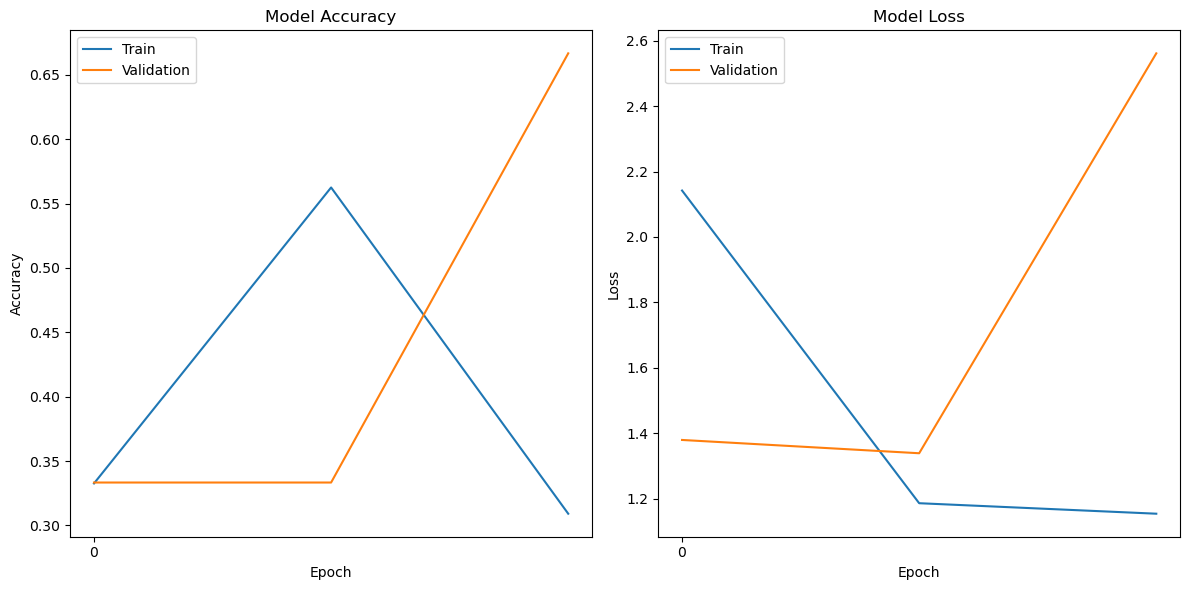

Fold #2
Shape of y (labels) in the batch: (32, 256, 256, 3)
Epoch 1/3


/home/arsalan/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3196 - loss: 2.7951
Epoch 1: val_loss improved from inf to 2.27245, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_res_net_2_fold_3_epoch_1k_dataset_size_a100/ResNet50_fold_2_model.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.3202 - loss: 2.7438 - val_accuracy: 0.6667 - val_loss: 2.2724 - learning_rate: 0.0010
Epoch 2/3
 1/15 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.5833 - loss: 1.1981

/home/arsalan/miniconda3/envs/tensorflow/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_loss improved from 2.27245 to 2.10456, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_res_net_2_fold_3_epoch_1k_dataset_size_a100/ResNet50_fold_2_model.keras


2024-10-16 18:59:46.296535: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.5833 - loss: 1.1981 - val_accuracy: 0.6667 - val_loss: 2.1046 - learning_rate: 0.0010
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3605 - loss: 1.0814
Epoch 3: val_loss did not improve from 2.10456
15/15 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - accuracy: 0.3613 - loss: 1.0837 - val_accuracy: 0.6667 - val_loss: 2.5551 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 2.
Elpased time: 0:02:24
batch_index: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
batch_index: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step
batch_index: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step
batch_index: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step
batch_index: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step
batch_index: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 895ms/step
batch_index: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 873ms/step
batch_index: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step
batch_index: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step
batch_index: 10
1/1 ━━━━━━━━

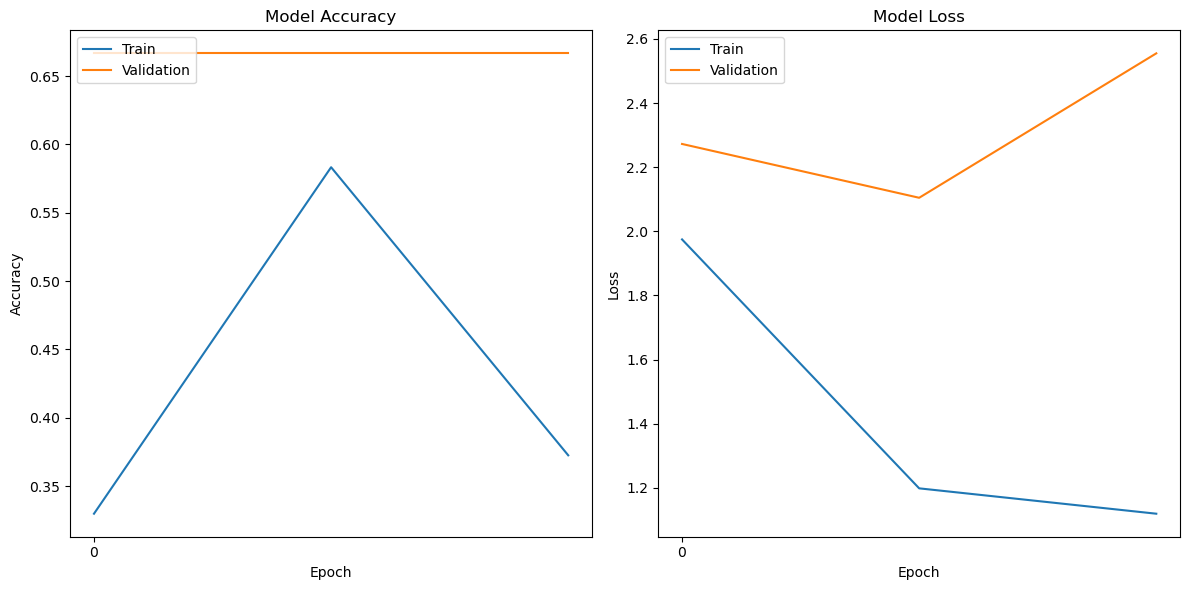

stored all splits' history in training_stats.csv


'out_of_sample_y.shape: '

(1000, 3, 1)

'out_of_sample_y: '

array([[[1],
        [0],
        [0]],

       [[1],
        [0],
        [0]],

       [[1],
        [0],
        [0]],

       [[1],
        [0],
        [0]],

       [[1],
        [0],
        [0]]])

'out_of_sample_compare.shape: '

(1000, 1)

'out_of_sample_compare'

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [5]:
if folds !=1:
    from jet_ml.dataset import create_train_data_generator, create_validation_data_generator
    from jet_ml.models.resnet import build_model
    from jet_ml.models.helpers import compile_model
    from jet_ml.models.resnet import train_model
    from jet_ml.evaluation import get_accuracy

    # fold, shuffle, x, y_raw
    import numpy as np
    from sklearn.model_selection import StratifiedKFold
    from sklearn import metrics
    k_fold=StratifiedKFold(folds,shuffle=True,random_state=42)

    out_of_sample_y=[]
    out_of_sample_pred=[]
    folds_accuracy=[]
    epochs_needed = []
    times_taken=[]
    fold=0

    #Must specify y StratifiedKFold for classification
    for train,test in k_fold.split(x,y_raw):
        fold+=1
        print(f"Fold #{fold}")

        x_train=x_resized[train]
        y_train=y_resized[train]
        train_generator = create_train_data_generator(x_train, y_train)
        # Get a batch of data
        x_batch, y_batch = next(train_generator)

        # Get the shape of y (labels) from the batch
        x_batch_shape = x_batch.shape

        print("Shape of x in the batch:", x_batch_shape)
        
        #log train_generator size
        # print(f"train_generator size: {len(train_generator)}")
        x_test=x_resized[test]
        y_test=y_resized[test]
        val_generator = create_validation_data_generator(x_test, y_test)

        # from jet_ml.models import resnet
        from tensorflow.keras.layers import Input
        
        input_tensor = Input(shape=(HEIGHT, WIDTH, 3))
        output_shape=y.shape[1]
        activation='softmax'
        import tensorflow as tf
        with tf.device('GPU:0'):#/GPU:0
            model=build_model(input_tensor,num_classes=output_shape,activation=activation)
            # model.summary()
            model=compile_model(model)
            monitor='val_accuracy' #'val_accuracy' or 'val_loss'
            
            model, history,elapsed_time,stopped_epoch=train_model(model,
                                                                train_generator,val_generator,
                                                                epochs=epochs,monitor=monitor,
                                                                fold=fold)

        from jet_ml.evaluation import get_accuracy_from_generator
        pred, score=get_accuracy_from_generator(model=model, data_generator=val_generator)
        print("Accuracy:", score)
        folds_accuracy.append(score)
        times_taken.append(elapsed_time)    
        epochs_needed.append(epochs)

        out_of_sample_y.append(y_test)
        out_of_sample_pred.append(pred)
        print(f"Fold score (accuracy): {score}")

        from jet_ml.evaluation import save_training_history
        save_training_history(history=history,fold=fold)

        from jet_ml.evaluation import plot_training_history
        plot_training_history(history=history,fold=fold)

    from jet_ml.evaluation import save_training_stats
    save_training_stats(accuracies=folds_accuracy,
                        epochs_needed=epochs_needed,
                        times_taken=times_taken)

    # Build the oos prediction list and calculate the error.
    out_of_sample_y=np.concatenate(out_of_sample_y)
    display("out_of_sample_y.shape: ", out_of_sample_y.shape)
    display("out_of_sample_y: ",out_of_sample_y[:5])

    out_of_sample_pred=np.concatenate(out_of_sample_pred)

    # convert the out_of_sample_y to a 1D array
    out_of_sample_y_compare=np.argmax(out_of_sample_y,axis=1)# For accuracy and confusion matrix calculation
    display("out_of_sample_compare.shape: ",out_of_sample_y_compare.shape)
    display("out_of_sample_compare" ,out_of_sample_y_compare[:5])


In [6]:
from jet_ml.evaluation import calculate_accuracy
calculate_accuracy(out_of_sample_y_compare,out_of_sample_pred)

0.333

In [7]:
from jet_ml.evaluation import store_out_of_sample_y_and_predictions
# convert out_of_sample_y from (1000, 3, 1) to (1000, 3)
out_of_sample_y_squeezed=np.squeeze(out_of_sample_y,axis=2)
store_out_of_sample_y_and_predictions(y_df,out_of_sample_y_squeezed,out_of_sample_pred,y_classes)

Confusion matrix, without normalization
[[167 168   0]
 [167 166   0]
 [166 166   0]]
Normalized confusion matrix
[[0.5 0.5 0. ]
 [0.5 0.5 0. ]
 [0.5 0.5 0. ]]


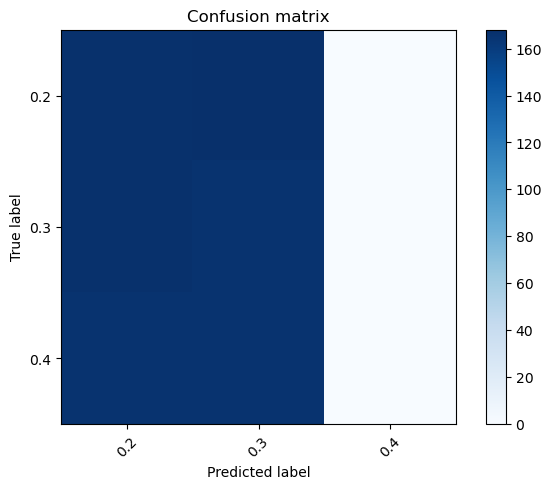

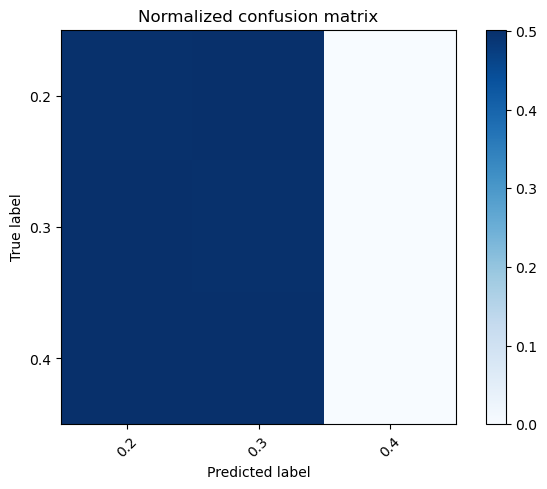

In [9]:
from jet_ml.evaluation import calculate_confusion_matrix
calculate_confusion_matrix(out_of_sample_y_compare, out_of_sample_pred,y_classes)